# Predictor de precio Crypto
## Prueba

In [1]:
# https://www.analyticsvidhya.com/blog/2021/12/cryptocurrency-price-prediction-using-arima-model/?utm_source=feedburner&utm_medium=email

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [52]:
!pip install mpl_finance

In [6]:
df = pd.read_csv('~/crypto-markets.csv')
#df.info()
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [7]:
# Transforming date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [9]:
# Getting a dataframe containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()


Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9285290000,139325000000,0.1235,1608.16
2658,ethereum,ETH,Ethereum,2018-02-05,2,834.960000,856.650000,644.600000,697.950000,4269530000,81337400000,0.2516,212.05
4305,ripple,XRP,Ripple,2018-02-05,3,0.825943,0.833866,0.675827,0.691799,1286180000,32219400000,0.1011,0.16
4503,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,4,1159.890000,1172.700000,839.950000,887.410000,568117000,19659800000,0.1426,332.75
4631,cardano,ADA,Cardano,2018-02-05,5,0.385044,0.399523,0.319646,0.327371,658548000,9983060000,0.0967,0.08


In [10]:
print("Number of cryptocurrencies listed: ")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed: 


1461

In [23]:
x = 25

In [24]:
# starting dates for all currencies
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
155,Bitcoin,1,2013-04-28
789,Litecoin,6,2013-04-28
916,Novacoin,483,2013-04-28
983,Peercoin,148,2013-04-28
1287,Terracoin,582,2013-04-28
890,Namecoin,241,2013-04-28
844,Mincoin,1006,2013-05-03
555,Freicoin,1016,2013-05-03
528,Feathercoin,269,2013-05-03
720,Ixcoin,923,2013-05-08


In [25]:
# List of the new ones
print("New Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

New Cryptocurrencies


,name,ranknow,start_date
459,Electronic PK Chain,1171,2018-01-30
1214,Speed Mining Service,1283,2018-01-30
169,Bitcoin White,1260,2018-01-30
254,Candy,1262,2018-01-30
1371,ValueChain,1212,2018-01-30
633,HalalChain,1188,2018-01-30
1456,Zeepin,1200,2018-01-30
641,Health Mutual Society,1254,2018-01-30
243,CPChain,1202,2018-01-30
932,OceanChain,1161,2018-01-30


In [26]:
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1              [Bitcoin]
2             [Ethereum]
3               [Ripple]
4         [Bitcoin Cash]
5              [Cardano]
6             [Litecoin]
7                  [NEO]
8              [Stellar]
9                  [EOS]
10                 [NEM]
11                [IOTA]
12                [Dash]
13              [Monero]
14                [TRON]
15              [Tether]
16                [Lisk]
17             [VeChain]
18    [Ethereum Classic]
19                [ICON]
20                [Qtum]
21        [Bitcoin Gold]
22                [Nano]
23            [Populous]
24               [Zcash]
25             [OmiseGO]
Name: name, dtype: object

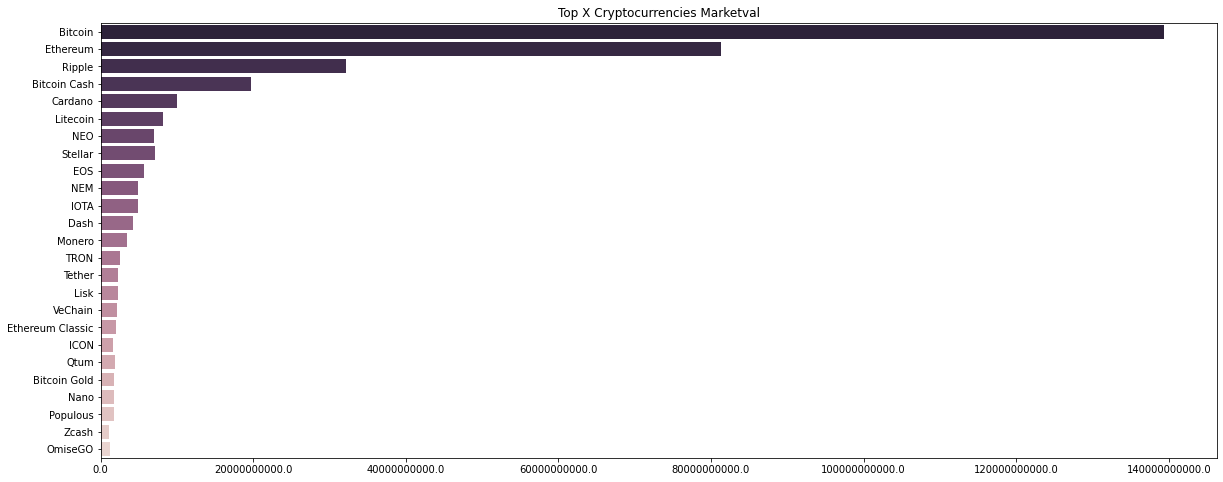

In [27]:
# Plotting the top X currencies according to market valuation
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

In [59]:
# Plotting the top X currencies by volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

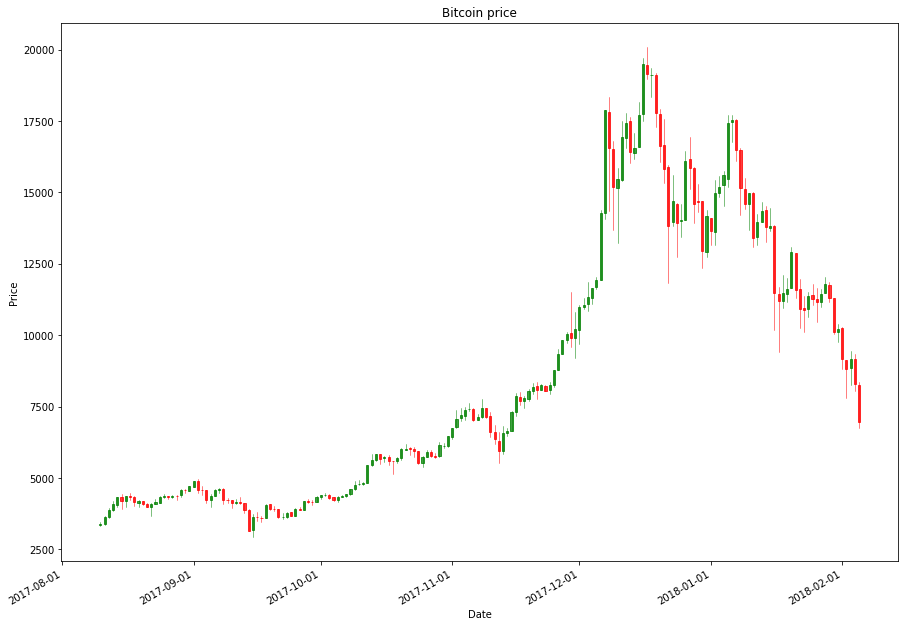

In [57]:
# Candlestick chart for Bitcoin
rank = 1
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

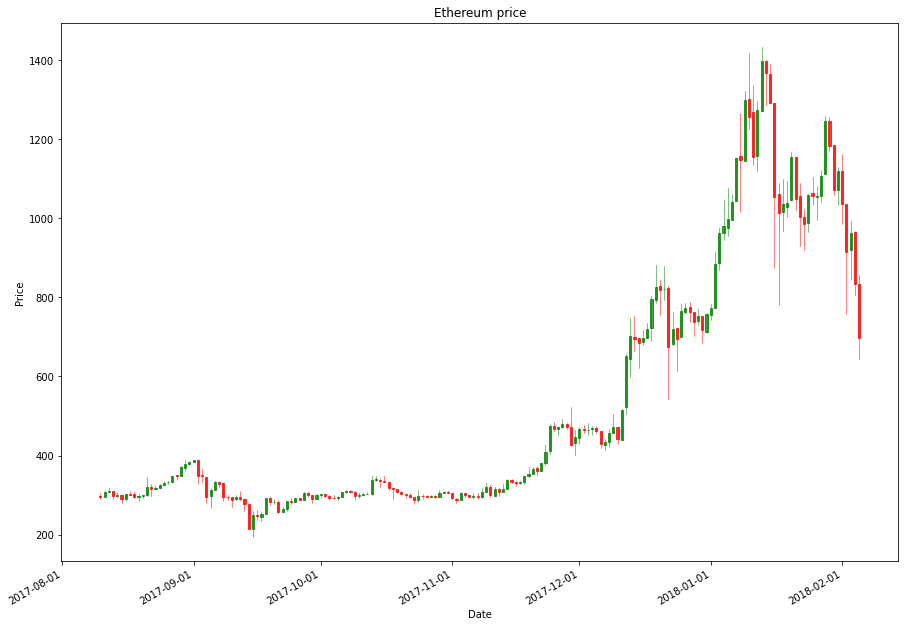

In [58]:
# Candlestick chart for Etherium
rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

In [60]:
# Moving average chart for Bitcoin
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

ValueError: 
EWMA($lpha=.03$)
     ^
Expected end of text, found '$'  (at char 5), (line:1, col:6)

<Figure size 1080x792 with 1 Axes>

In [64]:
''' Moving average chart for Etherium
'''
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()


ValueError: 
EWMA($lpha=.03$)
     ^
Expected end of text, found '$'  (at char 5), (line:1, col:6)

<Figure size 1080x792 with 1 Axes>

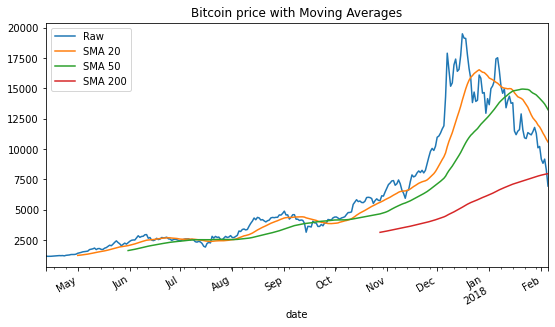

In [65]:
# Moving average chart for BTC
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
filtered_df.set_index('date', inplace=True)
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
smaplot =pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(9,5), legend=True, title="Bitcoin price with Moving Averages")
plt.gcf().autofmt_xdate()
plt.show()

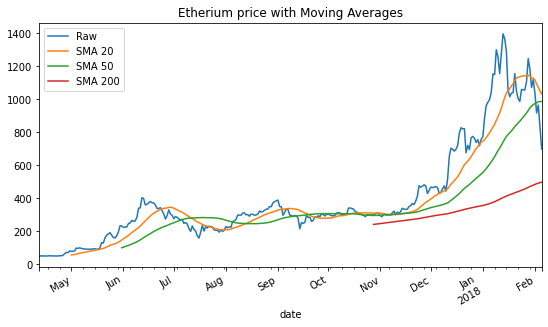

In [66]:
# Moving average chart for ETH
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(9,5), legend=True, title="Etherium price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()